<a href="https://colab.research.google.com/github/aavella77/fft/blob/main/fft_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* From Python Numerical Methods from Berkeley Chapter 24 available [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)
* This algorithm uses [Python slicing](https://www.pythontutorial.net/advanced-python/python-slicing/), in particular **seq[start|stop|step]**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        print("N: ", N)
        print("x: ", x)
        X_even = FFT(x[::2])
        print("X_even: ", X_even)
        X_odd = FFT(x[1::2])
        # print("X_odd: ", X_odd)       
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

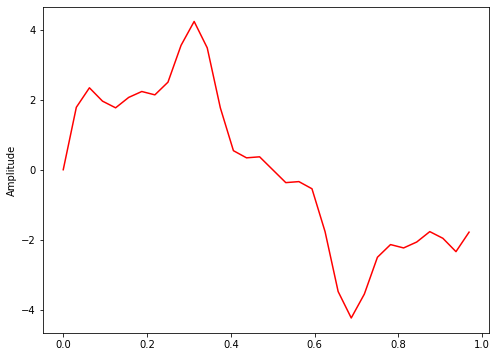

In [12]:
# sampling rate
sr = 32
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [13]:
X=FFT(x)


N:  32
x:  [ 0.00000000e+00  1.78277039e+00  2.33939201e+00  1.95808267e+00
  1.76776695e+00  2.06508717e+00  2.23357836e+00  2.13770390e+00
  2.50000000e+00  3.55191746e+00  4.23357836e+00  3.47930073e+00
  1.76776695e+00  5.43869112e-01  3.39392013e-01  3.68556825e-01
  3.06161700e-16 -3.68556825e-01 -3.39392013e-01 -5.43869112e-01
 -1.76776695e+00 -3.47930073e+00 -4.23357836e+00 -3.55191746e+00
 -2.50000000e+00 -2.13770390e+00 -2.23357836e+00 -2.06508717e+00
 -1.76776695e+00 -1.95808267e+00 -2.33939201e+00 -1.78277039e+00]
N:  16
x:  [ 0.00000000e+00  2.33939201e+00  1.76776695e+00  2.23357836e+00
  2.50000000e+00  4.23357836e+00  1.76776695e+00  3.39392013e-01
  3.06161700e-16 -3.39392013e-01 -1.76776695e+00 -4.23357836e+00
 -2.50000000e+00 -2.23357836e+00 -1.76776695e+00 -2.33939201e+00]
N:  8
x:  [ 0.00000000e+00  1.76776695e+00  2.50000000e+00  1.76776695e+00
  3.06161700e-16 -1.76776695e+00 -2.50000000e+00 -1.76776695e+00]
N:  4
x:  [ 0.000000e+00  2.500000e+00  3.061617e-16 -2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


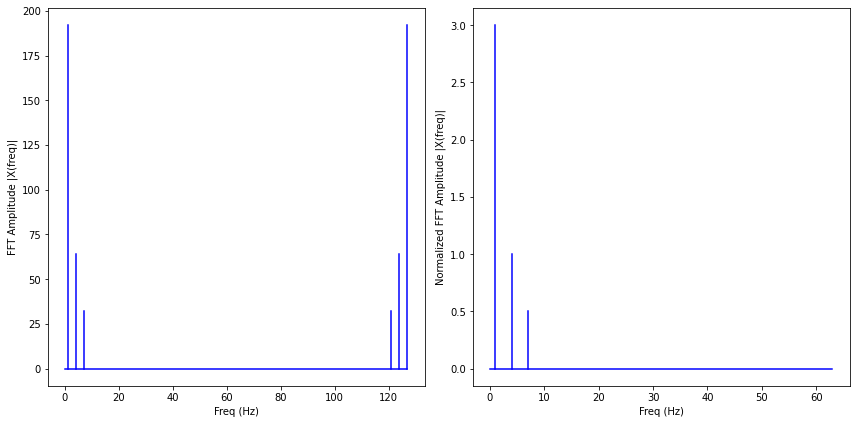

In [5]:
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()